In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.cm as cm

import re
import os
import h5py

import json
from tqdm import tqdm
from Read_and_Process import *
from sklearn.cluster import KMeans
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries

In [2]:
Lambda_Ln1 = Read_and_Process(group_name="Lambda_Ln1")
Lambda_Lp1 = Read_and_Process(group_name="Lambda_Lp1")
Lambda_L0 = Read_and_Process(group_name="Lambda_L0")

Racemic_Ln1 = Read_and_Process(group_name="Racemic_Ln1")
Racemic_Lp1 = Read_and_Process(group_name="Racemic_Lp1")
Racemic_L0 = Read_and_Process(group_name="Racemic_L0")

File already exist
File already exist
File already exist
File already exist
File already exist
File already exist


In [3]:
ROIs = {"Signal": np.s_[470:770, 5:230],
        "Bkg":  np.s_[550:750, 270:490]
        }

ROIs2 = {"Signal": np.s_[470:770, 5:230],
        "Bkg":  np.s_[550:750, 270:490]
        }


Lambda_Ln1.calculate_XAS(ROIs=ROIs2)
Lambda_Lp1.calculate_XAS(ROIs=ROIs2)
Lambda_L0.calculate_XAS(ROIs=ROIs2)

Racemic_Ln1.calculate_XAS(ROIs=ROIs)
Racemic_Lp1.calculate_XAS(ROIs=ROIs)
Racemic_L0.calculate_XAS(ROIs=ROIs)

100%|██████████| 8/8 [00:03<00:00,  2.47it/s]
/Users/manuelfernandosanchezalarcon/Desktop/Trieste_Project/Data/Scripts/Read_and_Process.py:165: RuntimeWarning: invalid value encountered in divide
  self.cv_maps_per_E = np.std(I0_images, axis = 0)/np.mean(I0_images, axis = 0)
100%|██████████| 1/1 [00:00<00:00,  2.17it/s]


In [4]:
#print(Lambda_Ln1.file.keys())
#print(group.file["Energy"][...])
#print(group.file["Runs_Groups_Info"].keys())
#print(group.file["I0_Normalized_Images"].keys())
#print(group.file["I0_Normalized_Images/Scan_1"].keys())
#print(group.file["Runs_Groups_Info/Run_1_Info"].keys())
#print(group.file["Runs_Groups_Info/Run_1_Info/Logbook_scan_name"][...])
#print(group.file["Runs_Groups_Info/Initial run"][...])

In [5]:
ROI_XAS = np.s_[:-4]

Racemic_XAS_mean = (Racemic_Lp1.XAS + Racemic_Ln1.XAS + Racemic_L0.XAS)/3

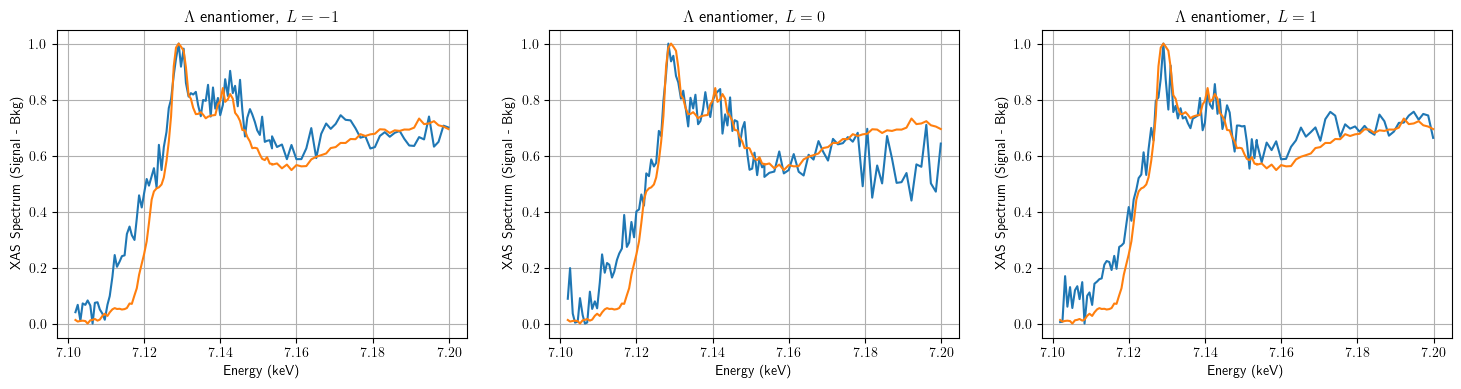

In [6]:
plt.figure(figsize=(18,4))

plt.subplot(1,3,1)
plt.plot(Lambda_Ln1.Energies[ROI_XAS], normalize(Lambda_Ln1.XAS[ROI_XAS] - Lambda_Ln1.XAS_bkg[ROI_XAS]))
plt.plot(Racemic_Ln1.Energies[ROI_XAS], normalize(Racemic_XAS_mean[ROI_XAS]))
plt.title(r"$\Lambda$ enantiomer, $L = -1$")
plt.xlabel("Energy (keV)")
plt.ylabel("XAS Spectrum (Signal - Bkg)")
plt.grid()

plt.subplot(1,3,2)
plt.plot(Lambda_L0.Energies[ROI_XAS], normalize(Lambda_L0.XAS[ROI_XAS] - Lambda_L0.XAS_bkg[ROI_XAS]))
plt.plot(Racemic_L0.Energies[ROI_XAS], normalize(Racemic_XAS_mean[ROI_XAS]))
plt.title(r"$\Lambda$ enantiomer, $L = 0$")
plt.xlabel("Energy (keV)")
plt.ylabel("XAS Spectrum (Signal - Bkg)")
plt.grid()

plt.subplot(1,3,3)
plt.plot(Lambda_Lp1.Energies[ROI_XAS], normalize(Lambda_Lp1.XAS[ROI_XAS] - Lambda_Lp1.XAS_bkg[ROI_XAS]))
plt.plot(Racemic_Lp1.Energies[ROI_XAS], normalize(Racemic_XAS_mean[ROI_XAS]))
plt.title(r"$\Lambda$ enantiomer, $L = 1$")
plt.xlabel("Energy (keV)")
plt.ylabel("XAS Spectrum (Signal - Bkg)")
plt.grid()

In [7]:
def HD_signal(Ln1, Lp1, max=True):
    if(max):
        return (Lp1 - Ln1)/(0.5*(Ln1.max() + Lp1.max()))
    else:
        return (Lp1 - Ln1)/(0.5*(Ln1 + Lp1))

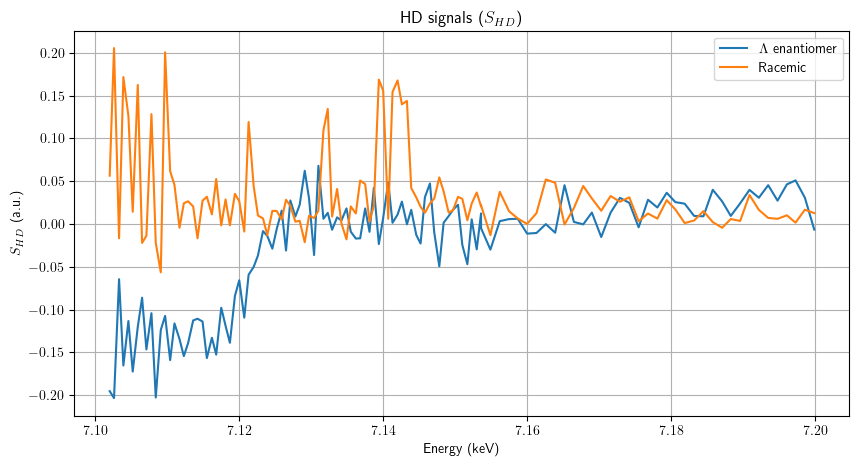

In [8]:
HD_signal_Lambda = HD_signal(Lambda_Ln1.XAS[ROI_XAS] - Lambda_Ln1.XAS_bkg[ROI_XAS], Lambda_Lp1.XAS[ROI_XAS] - Lambda_Lp1.XAS_bkg[ROI_XAS], max=False)

HD_signal_Racemic = HD_signal(Racemic_Ln1.XAS[ROI_XAS], Racemic_Lp1.XAS[ROI_XAS], max=False)


plt.figure(figsize=(10,5))

plt.plot(Lambda_Ln1.Energies[ROI_XAS], HD_signal_Lambda+1, label=r"$\Lambda$ enantiomer")
plt.plot(Lambda_Ln1.Energies[ROI_XAS], HD_signal_Racemic, label=r"Racemic")
plt.title(r"HD signals ($S_{HD}$)")
plt.xlabel("Energy (keV)")
plt.ylabel(r"$S_{HD}$ (a.u.)")
plt.grid()
plt.legend()

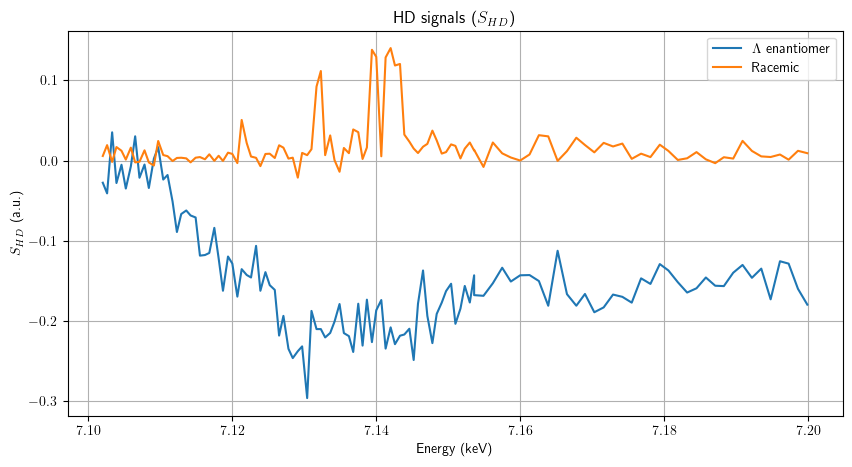

In [9]:
HD_signal_Lambda = HD_signal(Lambda_Ln1.XAS[ROI_XAS] - Lambda_Ln1.XAS_bkg[ROI_XAS], Lambda_Lp1.XAS[ROI_XAS] - Lambda_Lp1.XAS_bkg[ROI_XAS], max=True)

HD_signal_Racemic = HD_signal(Racemic_Ln1.XAS[ROI_XAS], Racemic_Lp1.XAS[ROI_XAS], max=True)


plt.figure(figsize=(10,5))

plt.plot(Lambda_Ln1.Energies[ROI_XAS], HD_signal_Lambda + 0.7, label=r"$\Lambda$ enantiomer")# Shift for vidualization purposes.
plt.plot(Lambda_Ln1.Energies[ROI_XAS], HD_signal_Racemic, label=r"Racemic")
plt.title(r"HD signals ($S_{HD}$)")
plt.xlabel("Energy (keV)")
plt.ylabel(r"$S_{HD}$ (a.u.)")
plt.grid()
plt.legend()

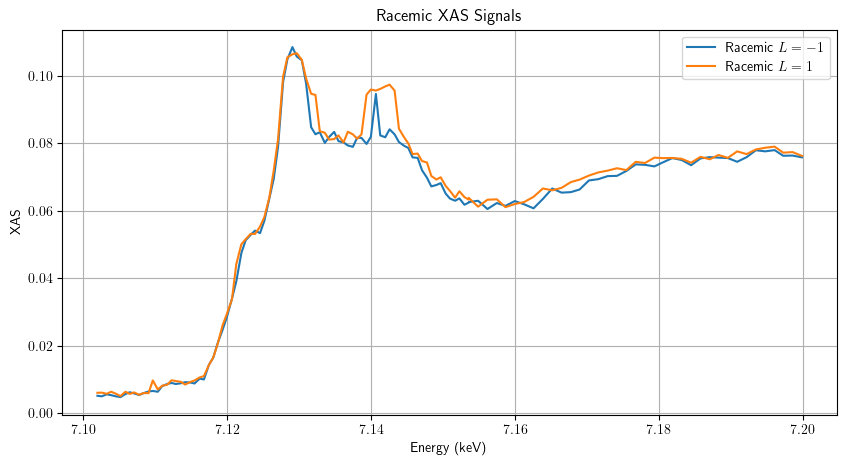

In [10]:
XAS_signal_Racemic_Ln1 = Racemic_Ln1.XAS[ROI_XAS] - Racemic_Ln1.XAS_bkg[ROI_XAS]
XAS_signal_Racemic_Lp1 = Racemic_Lp1.XAS[ROI_XAS] - Racemic_Lp1.XAS_bkg[ROI_XAS]

plt.figure(figsize=(10,5))

plt.plot(Racemic_Ln1.Energies[ROI_XAS], XAS_signal_Racemic_Ln1, label=r"Racemic $L=-1$") 
plt.plot(Racemic_Lp1.Energies[ROI_XAS], XAS_signal_Racemic_Lp1, label=r"Racemic $L=1$")
plt.title(r"Racemic XAS Signals")
plt.xlabel("Energy (keV)")
plt.ylabel(r"XAS")
plt.grid()
plt.legend()

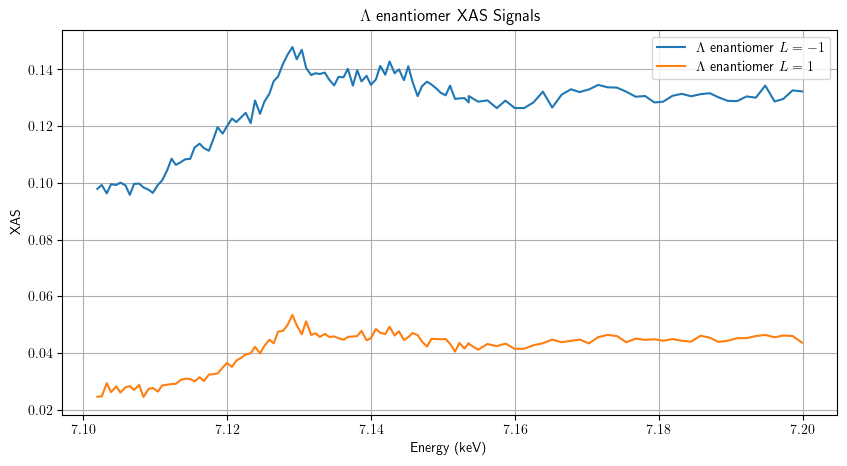

In [11]:
XAS_signal_Lambda_Ln1 = Lambda_Ln1.XAS[ROI_XAS] - Lambda_Ln1.XAS_bkg[ROI_XAS]
XAS_signal_Lambda_Lp1 = Lambda_Lp1.XAS[ROI_XAS] - Lambda_Lp1.XAS_bkg[ROI_XAS]

plt.figure(figsize=(10,5))

plt.plot(Lambda_Ln1.Energies[ROI_XAS], XAS_signal_Lambda_Ln1, label=r"$\Lambda$ enantiomer $L=-1$") 
plt.plot(Lambda_Lp1.Energies[ROI_XAS], XAS_signal_Lambda_Lp1, label=r"$\Lambda$ enantiomer $L=1$")
plt.title(r"$\Lambda$ enantiomer XAS Signals")
plt.xlabel("Energy (keV)")
plt.ylabel(r"XAS")
plt.grid()
plt.legend()